In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

In [2]:
loan_data_inputs_train = pd.read_csv('x_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [3]:
loan_data_inputs_train

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_NONE_ANY,home_ownership:MORTGAGE,home_ownership:OWN,...,mort_acc:0,mort_acc:none-zero,mths_since_recent_bc:<=4,mths_since_recent_bc:4-8,mths_since_recent_bc:8-14,mths_since_recent_bc:14-21,mths_since_recent_bc:21-29,mths_since_recent_bc:29-41,mths_since_recent_bc:41-68,mths_since_recent_bc:>68
231010,1,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
204675,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
379340,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1081690,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
178479,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35385,1,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1572056,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
851973,0,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
44515,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [4]:
feature_selected = ['grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G',
                    'home_ownership:RENT_NONE_ANY','home_ownership:MORTGAGE','home_ownership:OWN',
                    'verification_status:Not Verified','verification_status:Source Verified',
                    'verification_status:Verified','purpose:RE_MV_HS','purpose:med_other_wed', 
                    'purpose:debt_consolidation', 'purpose:vac_majp','purpose:home_cred','purpose:car_edu',
                    'purpose:small_business','addr_state:CA','addr_state:MA','addr_state:NY','addr_state:TX',
                    'addr_state:IA_AR_MS_AL_OK_LA','addr_state:NV_NM_SD','addr_state:FL_NE_TN_HI_MO_MD',
                    'addr_state:NJ_NC_IN_KY','addr_state:PA_VA_AK','addr_state:AZ_MI','addr_state:OH_MN_DE',
                    'addr_state:WI_UT_GA_WV_RI','addr_state:ND_WY_IL','addr_state:MT_KS_ID',
                    'addr_state:WA_CT_CO_SC','addr_state:NH_OR_DC_VT_ME','loan_amnt:<=1600',
                    'loan_amnt:1600-3500','loan_amnt:3500-5000','loan_amnt:5000-6000','loan_amnt:6000-7000',
                    'loan_amnt:7000-8000','loan_amnt:8000-9000','loan_amnt:9000-10000',
                    'loan_amnt:10000-35000','loan_amnt:>35000','term:36','term:60',
                    'annual_inc:<35K','annual_inc:35K-43K','annual_inc:43K-50K','annual_inc:50K-58K',
                    'annual_inc:58K-65K','annual_inc:65K-75K','annual_inc:75K-85K','annual_inc:85K-100K',
                    'annual_inc:100K-130K','annual_inc:>130K','dti:<10','dti:10-15','dti:15-20','dti:20-25',
                    'dti:25-30','dti:>30','all_util:missing','all_util:<=30','all_util:30-40','all_util:40-50',
                    'all_util:50-60','all_util:60-70','all_util:>70','mort_acc:0','mort_acc:none-zero',
                    'mths_since_recent_bc:<=4','mths_since_recent_bc:4-8','mths_since_recent_bc:8-14',
                    'mths_since_recent_bc:14-21','mths_since_recent_bc:21-29',
                    'mths_since_recent_bc:29-41','mths_since_recent_bc:41-68','mths_since_recent_bc:>68']

In [7]:
ref_cat=['grade:G',
 'verification_status:Verified',
 'home_ownership:RENT_NONE_ANY',
 'purpose:small_business',
 'addr_state:IA_AR_MS_AL_OK_LA',
 'loan_amnt:10000-35000',
 'term:60',
 'annual_inc:<35K',
 'dti:>30',
 'all_util:>70',
 'mort_acc:0',
 'mths_since_recent_bc:<=4']

In [8]:
loan_data_inputs_train = loan_data_inputs_train[feature_selected]
inputs_train = loan_data_inputs_train.drop(ref_cat, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,verification_status:Not Verified,verification_status:Source Verified,...,all_util:50-60,all_util:60-70,mort_acc:none-zero,mths_since_recent_bc:4-8,mths_since_recent_bc:8-14,mths_since_recent_bc:14-21,mths_since_recent_bc:21-29,mths_since_recent_bc:29-41,mths_since_recent_bc:41-68,mths_since_recent_bc:>68
231010,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
204675,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
379340,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1081690,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
178479,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35385,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1572056,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
851973,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
44515,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.predict = self.model.predict
        self.predict_proba = self.model.predict_proba
        self.p_values = p_values

In [11]:
len(loan_data_targets_train[loan_data_targets_train.good_bad ==0])/len(loan_data_targets_train.good_bad)

0.1556252194675278

In [12]:
w = {0:0.155626, 1:0.844374}

In [13]:
reg = LogisticRegression(max_iter=5000, class_weight = w)
#woe_transform = WoE_Binning(X)
pipeline = Pipeline(steps=[('model', reg)])

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(pipeline, inputs_train, loan_data_targets_train['good_bad'].ravel(), scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.6982
Gini: 0.3964


In [14]:
scores

array([0.6975679 , 0.69968139, 0.69912941, 0.69642504, 0.69942053,
       0.69692701, 0.69861317, 0.69776714, 0.69985904, 0.69737531,
       0.6987429 , 0.69663672])

In [15]:
reg = LogisticRegression_with_p_values(max_iter=5000, random_state=1232, class_weight=w)
reg.fit(inputs_train, loan_data_targets_train['good_bad'].ravel())

In [16]:
feature_name = inputs_train.columns.values
pd.options.display.max_rows = None
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.184965,NaN
1,grade:A,2.266159,0.000000e+00
2,grade:B,1.539406,0.000000e+00
3,grade:C,1.048417,1.419337e-244
4,grade:D,0.670252,4.252709e-103
5,grade:E,0.367072,1.254369e-31
6,grade:F,0.092035,7.088543e-03
7,home_ownership:MORTGAGE,0.242747,4.363069e-74
8,home_ownership:OWN,0.139044,1.293947e-17
9,verification_status:Not Verified,0.238864,1.049482e-69


go back to notebook 4 to check variables that has p value larger than 0.05, drop mths_credit_history due to it's high p value

### Predict

In [17]:
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

X_test = dummy_creation(loan_data_inputs_test, ['grade','home_ownership', 'verification_status', 'purpose', 'addr_state'])
X_test['home_ownership:RENT_NONE_ANY'] = sum([X_test['home_ownership:RENT'], 
                                               X_test['home_ownership:NONE'],X_test['home_ownership:ANY']])
X_test['purpose:RE_MV_HS'] = sum([X_test['purpose:renewable_energy'],X_test['purpose:moving'],
                                  X_test['purpose:house']])
X_test['purpose:med_other_wed'] = sum([X_test['purpose:medical'], X_test['purpose:other'],
                                       X_test['purpose:wedding']])
X_test['purpose:vac_majp'] = sum([X_test['purpose:vacation'], X_test['purpose:major_purchase']])
X_test['purpose:home_cred'] = sum([X_test['purpose:home_improvement'], X_test['purpose:credit_card']])
X_test['purpose:car_edu']=sum([X_test['purpose:car']])
X_test['addr_state:IA_AR_MS_AL_OK_LA'] = sum([X_test['addr_state:AR'], X_test['addr_state:MS'],
                                               X_test['addr_state:AL'], X_test['addr_state:OK'],
                                               X_test['addr_state:LA']])
X_test['addr_state:NV_NM_SD'] = sum([X_test['addr_state:NV'],X_test['addr_state:NM'],X_test['addr_state:SD']])
X_test['addr_state:FL_NE_TN_HI_MO_MD'] = sum([X_test['addr_state:FL'],X_test['addr_state:NE'],
                                               X_test['addr_state:TN'],X_test['addr_state:HI'],
                                               X_test['addr_state:MO'],X_test['addr_state:MD']])
X_test['addr_state:NJ_NC_IN_KY'] = sum([X_test['addr_state:NJ'], X_test['addr_state:NC'], 
                                         X_test['addr_state:IN'], X_test['addr_state:KY']])
X_test['addr_state:PA_VA_AK']=sum([X_test['addr_state:PA'], X_test['addr_state:VA'], X_test['addr_state:AK']])
X_test['addr_state:AZ_MI'] = sum([X_test['addr_state:AZ'], X_test['addr_state:MI']])
X_test['addr_state:WI_UT_GA_WV_RI'] = sum([X_test['addr_state:WI'], X_test['addr_state:UT'], 
                                            X_test['addr_state:GA'], X_test['addr_state:WV'], 
                                            X_test['addr_state:RI']])
X_test['addr_state:OH_MN_DE'] = sum([X_test['addr_state:OH'], X_test['addr_state:MN'], X_test['addr_state:DE']])
X_test['addr_state:ND_WY_IL'] = sum([X_test['addr_state:ND'], X_test['addr_state:WY'], X_test['addr_state:IL']])
X_test['addr_state:MT_KS_ID'] = sum([X_test['addr_state:MT'], X_test['addr_state:KS'], X_test['addr_state:ID']])
X_test['addr_state:WA_CT_CO_SC'] = sum([X_test['addr_state:WA'], X_test['addr_state:CT'], 
                                         X_test['addr_state:CO'], X_test['addr_state:SC']])
X_test['addr_state:NH_OR_DC_VT_ME'] = sum([X_test['addr_state:NH'], X_test['addr_state:OR'],
                                            X_test['addr_state:DC'], X_test['addr_state:VT'], 
                                            X_test['addr_state:ME']])
X_test['loan_amnt:<=1600'] = np.where(X_test['loan_amnt']<=1600, 1, 0)
X_test['loan_amnt:1600-3500'] = np.where((X_test['loan_amnt']>1600) & (X_test['loan_amnt']<=3500), 1, 0)
X_test['loan_amnt:3500-5000'] = np.where((X_test['loan_amnt']>3500) & (X_test['loan_amnt']<=5000), 1, 0)
X_test['loan_amnt:5000-6000'] = np.where((X_test['loan_amnt']>5000) & (X_test['loan_amnt']<=6000), 1, 0)
X_test['loan_amnt:6000-7000'] = np.where((X_test['loan_amnt']>6000) & (X_test['loan_amnt']<=7000), 1, 0)
X_test['loan_amnt:7000-8000'] = np.where((X_test['loan_amnt']>7000) & (X_test['loan_amnt']<=8000), 1, 0)
X_test['loan_amnt:8000-9000'] = np.where((X_test['loan_amnt']>8000) & (X_test['loan_amnt']<=9000), 1, 0)
X_test['loan_amnt:9000-10000'] = np.where((X_test['loan_amnt']>9000) & (X_test['loan_amnt']<=10000), 1, 0)
X_test['loan_amnt:10000-35000'] = np.where((X_test['loan_amnt']>10000) & (X_test['loan_amnt']<=35000), 1, 0)
X_test['loan_amnt:>35000'] = np.where(X_test['loan_amnt']>35000, 1, 0)
X_test['term:36'] = np.where((X_test['term'] == 36), 1, 0)
X_test['term:60'] = np.where((X_test['term'] == 60), 1, 0)
X_test['int_rate:<=8.529'] = np.where(X_test['int_rate']<=8.529, 1, 0)
X_test['int_rate:8.529-11.738'] = np.where((X_test['int_rate']>8.529) & (X_test['int_rate']<=11.738), 1, 0)
X_test['int_rate:11.738-14.946'] = np.where((X_test['int_rate']>11.738) & (X_test['int_rate']<=14.946), 1, 0)
X_test['int_rate:14.946-18.155'] = np.where((X_test['int_rate']>14.946) & (X_test['int_rate']<=18.155), 1, 0)
X_test['int_rate:18.155-21.364'] = np.where((X_test['int_rate']>18.155) & (X_test['int_rate']<=21.364), 1, 0)
X_test['int_rate:>21.364'] = np.where(X_test['int_rate']>21.364, 1, 0)
X_test['annual_inc:<35K'] = np.where((X_test['annual_inc'] <= 35000), 1, 0)
X_test['annual_inc:35K-43K'] = np.where((X_test['annual_inc'] > 35000) & (X_test['annual_inc'] <= 43000), 1, 0)
X_test['annual_inc:43K-50K'] = np.where((X_test['annual_inc'] > 43000) & (X_test['annual_inc'] <= 50000), 1, 0)
X_test['annual_inc:50K-58K'] = np.where((X_test['annual_inc'] > 50000) & (X_test['annual_inc'] <= 58000), 1, 0)
X_test['annual_inc:58K-65K'] = np.where((X_test['annual_inc'] > 58000) & (X_test['annual_inc'] <= 65000), 1, 0)
X_test['annual_inc:65K-75K'] = np.where((X_test['annual_inc'] > 65000) & (X_test['annual_inc'] <= 75000), 1, 0)
X_test['annual_inc:75K-85K'] = np.where((X_test['annual_inc'] > 75000) & (X_test['annual_inc'] <= 85000), 1, 0)
X_test['annual_inc:85K-100K'] = np.where((X_test['annual_inc'] > 85000) & (X_test['annual_inc'] <= 100000), 1, 0)
X_test['annual_inc:100K-130K'] = np.where((X_test['annual_inc'] > 100000) & (X_test['annual_inc'] <= 130000), 1, 0)
X_test['annual_inc:>130K'] = np.where((X_test['annual_inc'] > 130000), 1, 0)
X_test['dti:<10'] = np.where((X_test['dti'] <= 10)|(X_test['dti'].isnull()), 1, 0)
X_test['dti:10-15'] = np.where((X_test['dti'] > 10) & (X_test['dti'] <= 15), 1, 0)
X_test['dti:15-20'] = np.where((X_test['dti'] > 15) & (X_test['dti'] <= 20), 1, 0)
X_test['dti:20-25'] = np.where((X_test['dti'] > 20) & (X_test['dti'] <= 25), 1, 0)
X_test['dti:25-30'] = np.where((X_test['dti'] > 25) & (X_test['dti'] <= 30), 1, 0)
X_test['dti:>30'] = np.where((X_test['dti'] > 30), 1, 0)
X_test['all_util:<=30'] = np.where(X_test['all_util']<=30, 1, 0)
X_test['all_util:missing'] = np.where(X_test['all_util'].isnull(), 1, 0)
X_test['all_util:30-40'] = np.where((X_test['all_util'] >30) & (X_test['all_util']<=40), 1, 0)
X_test['all_util:40-50'] = np.where((X_test['all_util'] >40) & (X_test['all_util']<=50), 1, 0)
X_test['all_util:50-60'] = np.where((X_test['all_util'] >50) & (X_test['all_util']<=60), 1, 0)
X_test['all_util:60-70'] = np.where((X_test['all_util'] >60) & (X_test['all_util']<=70), 1, 0)
X_test['all_util:>70'] = np.where((X_test['all_util'] >70), 1, 0)
X_test['mort_acc:0'] = np.where((X_test['mort_acc'] == 0), 1, 0)
X_test['mort_acc:none-zero'] = np.where((X_test['mort_acc'] != 0), 1, 0)
X_test['mths_since_recent_bc:<=4'] = np.where((X_test['mths_since_recent_bc']<=4) | (X_test['mths_since_recent_bc'].isnull()), 1, 0)
X_test['mths_since_recent_bc:4-8'] = np.where((X_test['mths_since_recent_bc']>4) & (X_test['mths_since_recent_bc']<=8), 1, 0)
X_test['mths_since_recent_bc:8-14'] = np.where((X_test['mths_since_recent_bc']>8) & (X_test['mths_since_recent_bc']<=14), 1, 0)
X_test['mths_since_recent_bc:14-21'] = np.where((X_test['mths_since_recent_bc']>14) & (X_test['mths_since_recent_bc']<=21), 1, 0)
X_test['mths_since_recent_bc:21-29'] = np.where((X_test['mths_since_recent_bc']>21) & (X_test['mths_since_recent_bc']<=29), 1, 0)
X_test['mths_since_recent_bc:29-41'] = np.where((X_test['mths_since_recent_bc']>29) & (X_test['mths_since_recent_bc']<=41), 1, 0)
X_test['mths_since_recent_bc:41-68'] = np.where((X_test['mths_since_recent_bc']>41) & (X_test['mths_since_recent_bc']<=68), 1, 0)
X_test['mths_since_recent_bc:>68'] = np.where((X_test['mths_since_recent_bc']>68), 1, 0)



In [18]:
feature_selected = ['grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G',
                    'home_ownership:RENT_NONE_ANY','home_ownership:MORTGAGE','home_ownership:OWN',
                    'verification_status:Not Verified','verification_status:Source Verified',
                    'verification_status:Verified','purpose:RE_MV_HS','purpose:med_other_wed', 
                    'purpose:debt_consolidation', 'purpose:vac_majp','purpose:home_cred','purpose:car_edu',
                    'purpose:small_business','addr_state:CA','addr_state:MA','addr_state:NY','addr_state:TX',
                    'addr_state:IA_AR_MS_AL_OK_LA','addr_state:NV_NM_SD','addr_state:FL_NE_TN_HI_MO_MD',
                    'addr_state:NJ_NC_IN_KY','addr_state:PA_VA_AK','addr_state:AZ_MI','addr_state:OH_MN_DE',
                    'addr_state:WI_UT_GA_WV_RI','addr_state:ND_WY_IL','addr_state:MT_KS_ID',
                    'addr_state:WA_CT_CO_SC','addr_state:NH_OR_DC_VT_ME','loan_amnt:<=1600',
                    'loan_amnt:1600-3500','loan_amnt:3500-5000','loan_amnt:5000-6000','loan_amnt:6000-7000',
                    'loan_amnt:7000-8000','loan_amnt:8000-9000','loan_amnt:9000-10000',
                    'loan_amnt:10000-35000','loan_amnt:>35000','term:36','term:60',
                    'annual_inc:<35K','annual_inc:35K-43K','annual_inc:43K-50K','annual_inc:50K-58K',
                    'annual_inc:58K-65K','annual_inc:65K-75K','annual_inc:75K-85K','annual_inc:85K-100K',
                    'annual_inc:100K-130K','annual_inc:>130K','dti:<10','dti:10-15','dti:15-20','dti:20-25',
                    'dti:25-30','dti:>30','all_util:missing','all_util:<=30','all_util:30-40','all_util:40-50',
                    'all_util:50-60','all_util:60-70','all_util:>70','mort_acc:0','mort_acc:none-zero',
                    'mths_since_recent_bc:<=4','mths_since_recent_bc:4-8','mths_since_recent_bc:8-14',
                    'mths_since_recent_bc:14-21','mths_since_recent_bc:21-29',
                    'mths_since_recent_bc:29-41','mths_since_recent_bc:41-68','mths_since_recent_bc:>68']
inputs_test_with_ref_cat = X_test[feature_selected] 
inputs_test = inputs_test_with_ref_cat.drop(ref_cat, axis = 1)

In [19]:
y_hat_test = reg.model.predict(inputs_test)
# get the predicted probabilities
y_hat_test_proba = reg.model.predict_proba(inputs_test)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]

In [20]:
y_test_temp = loan_data_targets_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

(333905, 2)

In [21]:
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = inputs_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba
113706,1,0.945880
509642,1,0.973397
388047,1,0.975151
576064,1,0.943453
482905,1,0.974098


#### Confusion Matrix and AUROC on Test Set

In [22]:
tr = 0.8
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimat threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[8.98459143e-06, 1.55127956e-01],
       [2.69537743e-05, 8.44836106e-01]])

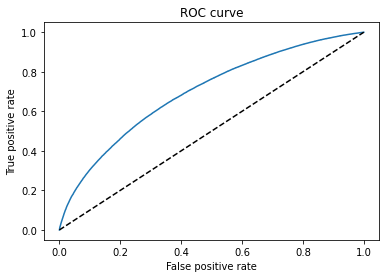

In [23]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [24]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.6977118224126037

In [25]:
# calculate Gini from AUROC
Gini = AUROC * 2 - 1
Gini

0.3954236448252073

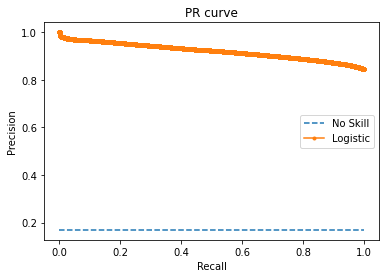

In [26]:
# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(loan_data_targets_test[loan_data_targets_test.good_bad == 1]) / (1335619 +len(loan_data_targets_test))
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [27]:
# calculate PR AUC
auc_pr = auc(recall, precision)
auc_pr

0.9205571381173209

In [28]:
import pickle

In [29]:
pickle.dump(reg, open('pd_model_ini.sav', 'wb'))